In [1]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
rna = anndata.read_h5ad("/lmh_data/data/sclab/GSE223917/rna_result.h5ad")
hic = anndata.read_h5ad("/lmh_data/data/sclab/GSE223917/hic_result.h5ad")

rna.obs['cell'] = rna.obs.index
hic.obs['cell'] = hic.obs.index
rna.obs.index = 'rna_' + rna.obs.index
hic.obs.index = 'hic_' + hic.obs.index

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


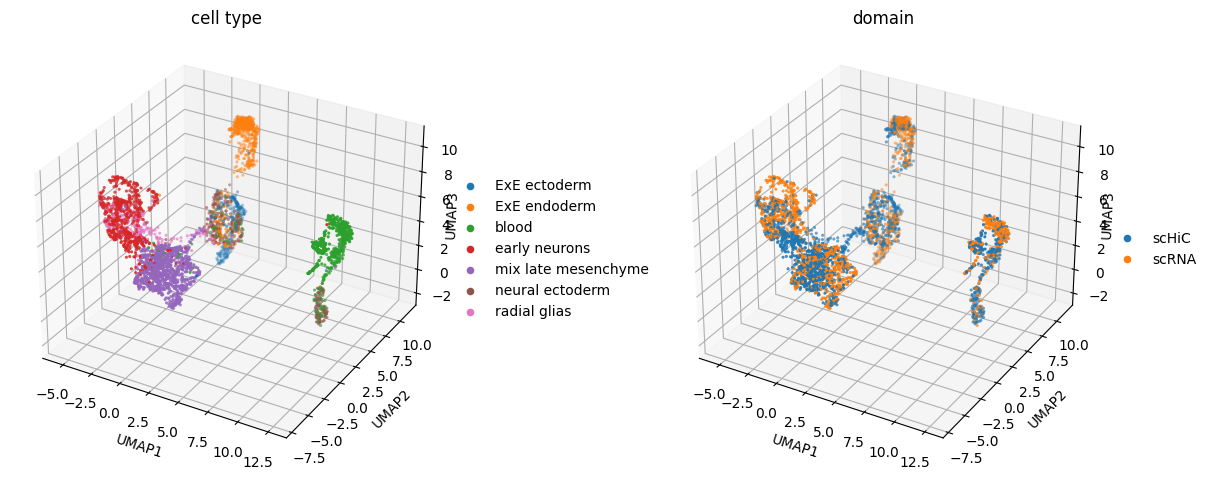

In [3]:
combined = anndata.concat([rna, hic])
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined, n_components=3)

fig = plt.figure(figsize=(12,5), constrained_layout=True)
axs = [
    fig.add_subplot(1, 2, 1, projection='3d'),
    fig.add_subplot(1, 2, 2, projection='3d')
]

sc.pl.umap(combined, color="cell_type", title="cell type", ax=axs[0], show=False, projection='3d')
sc.pl.umap(combined, color="domain", title="domain", ax=axs[1], show=False, projection='3d')

axs[0].set_xscale('linear')
axs[0].set_yscale('linear')
axs[0].set_zscale('linear')

axs[1].set_xscale('linear')
axs[1].set_yscale('linear')
axs[1].set_zscale('linear')

plt.show()

In [4]:
_distances = []
for _index in combined.obs['cell'].unique():
    _umap = combined[combined.obs[combined.obs['cell'] == _index].index].obsm['X_umap']
    _distance = float(np.sqrt(np.sum((_umap[0] - _umap[1])**2)))
    _distances.append(_distance)

In [5]:
_common_distances = []
for i in range(1000):
    _umap = combined.obsm['X_umap'][np.random.randint(0, combined.obsm['X_umap'].shape[0], 2)]
    _distance = float(np.sqrt(np.sum((_umap[0] - _umap[1])**2)))
    _common_distances.append(_distance)
np.mean(_common_distances)

9.990756098419428

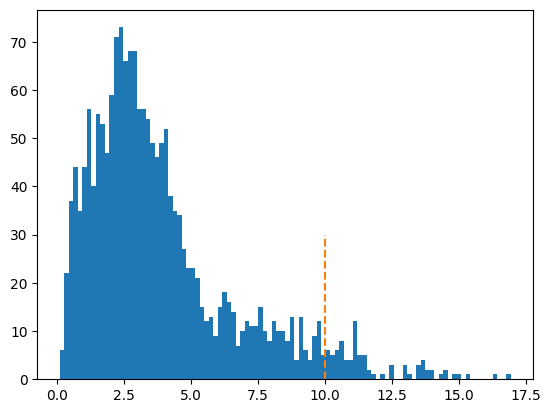

In [6]:
plt.hist(_distances, 100)
plt.plot([np.mean(_common_distances), np.mean(_common_distances)], [0, 30], linestyle='--')
plt.show()

In [7]:
_con = pd.DataFrame(combined.obsp['connectivities'].toarray(), columns=combined.obs_names, index=combined.obs_names)
_con = _con.loc[
    combined.obs[combined.obs['domain']=='scRNA'].index,
    combined.obs[combined.obs['domain']=='scHiC'].index
]
_con

,hic_GasaE751006,hic_GasaE751016,hic_GasaE751024,hic_GasaE751026,hic_GasaE751027,hic_GasaE751033,hic_GasaE751034,hic_GasaE751044,hic_GasaE751049,hic_GasaE751057,...,hic_OrgeEX053320,hic_OrgeEX053322,hic_OrgeEX053329,hic_OrgeEX053332,hic_OrgeEX053333,hic_OrgeEX053338,hic_OrgeEX053340,hic_OrgeEX053343,hic_OrgeEX053345,hic_OrgeEX053348
rna_GasaE751006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
rna_GasaE751016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
rna_GasaE751024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
rna_GasaE751026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
rna_GasaE751027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rna_OrgeEX053338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
rna_OrgeEX053340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
rna_OrgeEX053343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.085548,0.0,0.0,0.063353,0.042577,0.0,0.0,0.0
rna_OrgeEX053345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [8]:
result = dict(success=0, error=0, fail=0)
for rna_index in _con.index:
    _value = _con.loc[rna_index]
    hic_index = _value[_value!=0].index
    if len(hic_index) == 0:
        result['fail'] += 1
        continue
    if rna[rna_index].obs['cell_type'][0] in hic[hic_index].obs['cell_type'].unique():
        result['success'] += 1
    else:
        result['error'] += 1
result

{'success': 1625, 'error': 145, 'fail': 24}

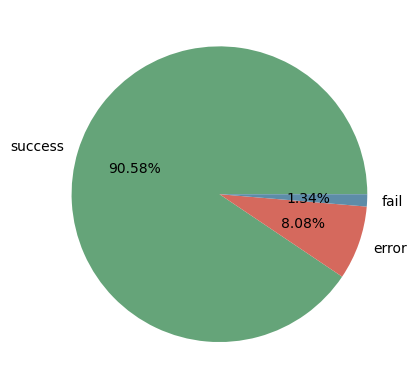

In [14]:
labels = []
sizes = []

for x, y in result.items():
    labels.append(x)
    sizes.append(y)

plt.pie(sizes, labels=labels, autopct='%.2f%%', colors=["#65a479", "#d5695d", "#5d8ca8"])
plt.show()

In [15]:
rna

AnnData object with n_obs × n_vars = 1794 × 50463
    obs: 'cell_type', 'domain', 'leiden', 'balancing_weight', 'cell'
    var: 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_type', 'mgi_id', 'havana_gene', 'tag', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: '__scglue__', 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_glue', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'